<a href="https://colab.research.google.com/github/varun2einstein/deep-learning/blob/master/nlp_course_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incomp

In [ ]:
from fastbook import *

In [ ]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1,
 'https://images.pexels.com/photos/97533/pexels-photo-97533.jpeg?cs=srgb&dl=animal-avian-bird-97533.jpg&fm=jpg')

In [ ]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

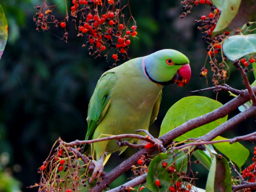

In [ ]:
im = Image.open(dest)
im.to_thumb(256, 256)

In [ ]:
from pathlib import Path
import shutil

searches = 'forest', 'bird'
path = Path('bird_or_not')

# Print the path and check if it exists
print("path:", path)
print("Path exists:", path.exists())

# Delete the directory if it exists
if path.exists():
    shutil.rmtree(path)
    print("Deleted existing path:", path)

# Create the directory if it does not exist
path.mkdir(exist_ok=True)
print("Created path:", path)

# Always execute the for loop regardless of whether the directory was newly created or already exists
for o in searches:
    dest = (path / o)
    dest.mkdir(exist_ok=True)
    print("destination:", dest)
    print("search term:", o)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)


path: bird_or_not
Path exists: True
Deleted existing path: bird_or_not
Created path: bird_or_not
destination: bird_or_not/forest
search term: forest
destination: bird_or_not/bird
search term: bird


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

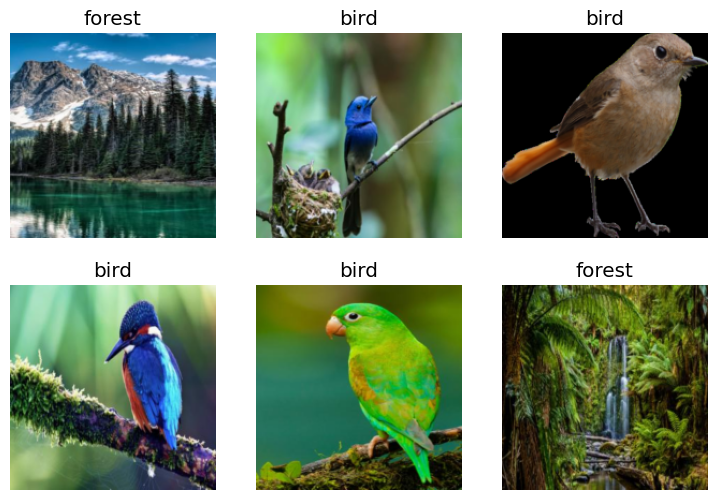

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)
dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 99.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.139846,0.818020,0.243243,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.069580,0.127287,0.054054,01:02
1,0.035100,0.009174,0.000000,01:05
2,0.023257,0.002697,0.000000,00:58


In [ ]:
is_bird, _, probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")


This is a: bird.
Probability it's a bird: 1.0000


In [ ]:
forest_path = Path('forest')
print(forest_path.absolute())


/content/forest


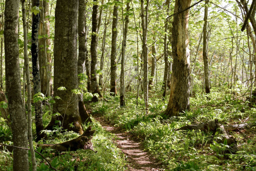

In [ ]:
image = search_images_ddg('forest photos', max_images=1)
download_url(image[0], forest_path, show_progress=False)
im = Image.open(forest_path)
im.to_thumb(256, 256)

In [ ]:
is_forest, _, probs = learn.predict(im)
print(f"This is a: {is_forest}.")
print(f"Probability it's a forest: {probs[1]:.4f}")

This is a: forest.
Probability it's a forest: 1.0000
